# Linear Regression Analysis of Cardiovascular Disease Healthcare Costs


This notebook analyzes the economic burden of Cardiovascular Disease (CVD) by performing a linear regression analysis on the `CVD_data2.csv` dataset. The analysis aims to understand the relationship between total healthcare costs and various predictors such as the number of comorbidities, age, and private insurance status. 
    


## 1. Data Loading and Preparation
    

In [ ]:

import pandas as pd
import io
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
    
# Load the dataset
df = pd.read_csv('CVD_data2.csv')
    
regression_vars = ['TOTTCHY1', 'TOTTCHY1_rank', 'total_comorbidities', 'AGEY1X', 'PRVEVY1']
df_clean = df[regression_vars].dropna()
    
print("Cleaned DataFrame Info:")
df_clean.info()
print("\nCleaned DataFrame Head:")
print(df_clean.head())
    

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6616 entries, 0 to 6740
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TOTTCHY1             6616 non-null   float64
 1   TOTTCHY1_rank        6616 non-null   float64
 2   total_comorbidities  6616 non-null   int64  
 3   AGEY1X               6616 non-null   float64
 4   PRVEVY1              6616 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 310.1 KB

Cleaned DataFrame Head:
   TOTTCHY1  TOTTCHY1_rank  total_comorbidities  AGEY1X  PRVEVY1
0       0.0          350.0                    1    65.0      1.0
1    1185.0         2315.5                    0    24.0      1.0
2   11453.0         5102.0                    1    62.0      1.0
3   10284.0         4960.0                    1    67.0      2.0
4    4172.0         3827.0                    2    62.0      1.0



## 2. Exploratory Data Analysis (EDA)
Before building the regression models, use exploratory data analysis to understand the distributions of our key variables and the relationships between them.
    

Summary Statistics:
           TOTTCHY1  TOTTCHY1_rank  total_comorbidities       AGEY1X  \
count  6.616000e+03    6616.000000          6616.000000  6616.000000   
mean   1.732716e+04    3337.997959             0.465538    44.422158   
std    5.761497e+04    1922.858433             0.814099    23.859820   
min    0.000000e+00     350.000000             0.000000     0.000000   
25%    6.100000e+02    1674.000000             0.000000    25.000000   
50%    2.848000e+03    3335.500000             0.000000    47.000000   
75%    1.061175e+04    5001.250000             1.000000    65.000000   
max    1.742563e+06    6688.000000             5.000000    85.000000   

           PRVEVY1  
count  6616.000000  
mean      1.412787  
std       0.492372  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  


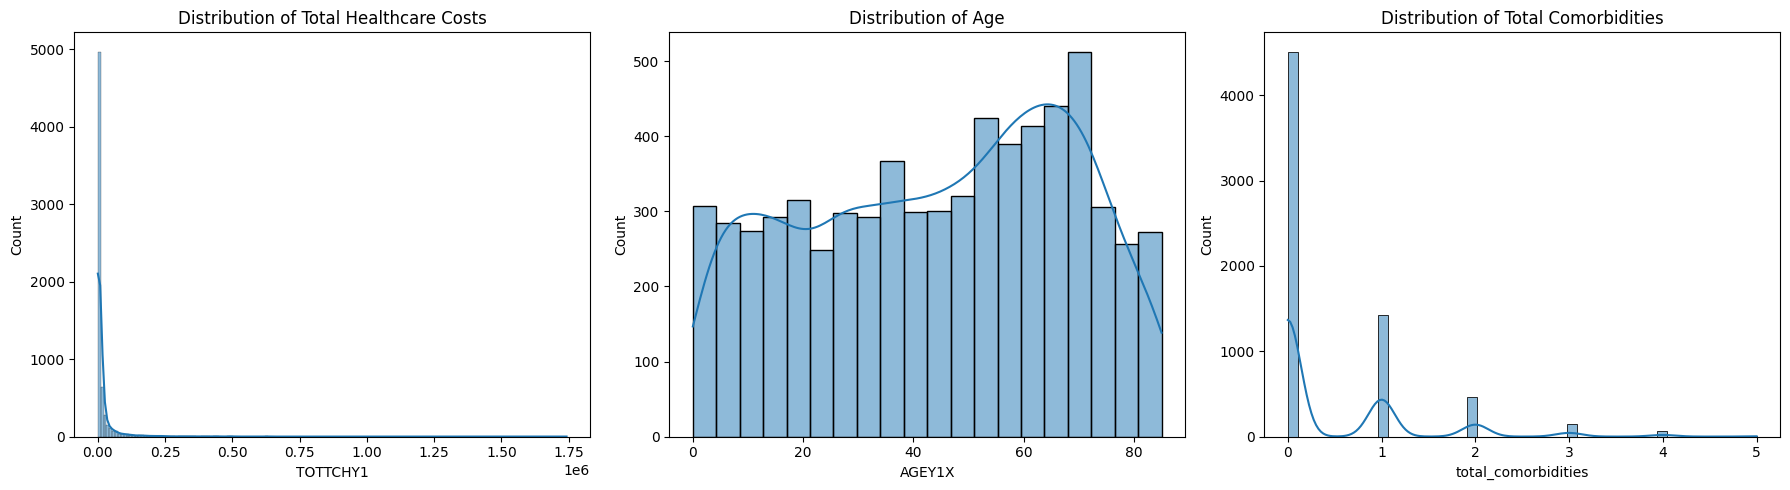

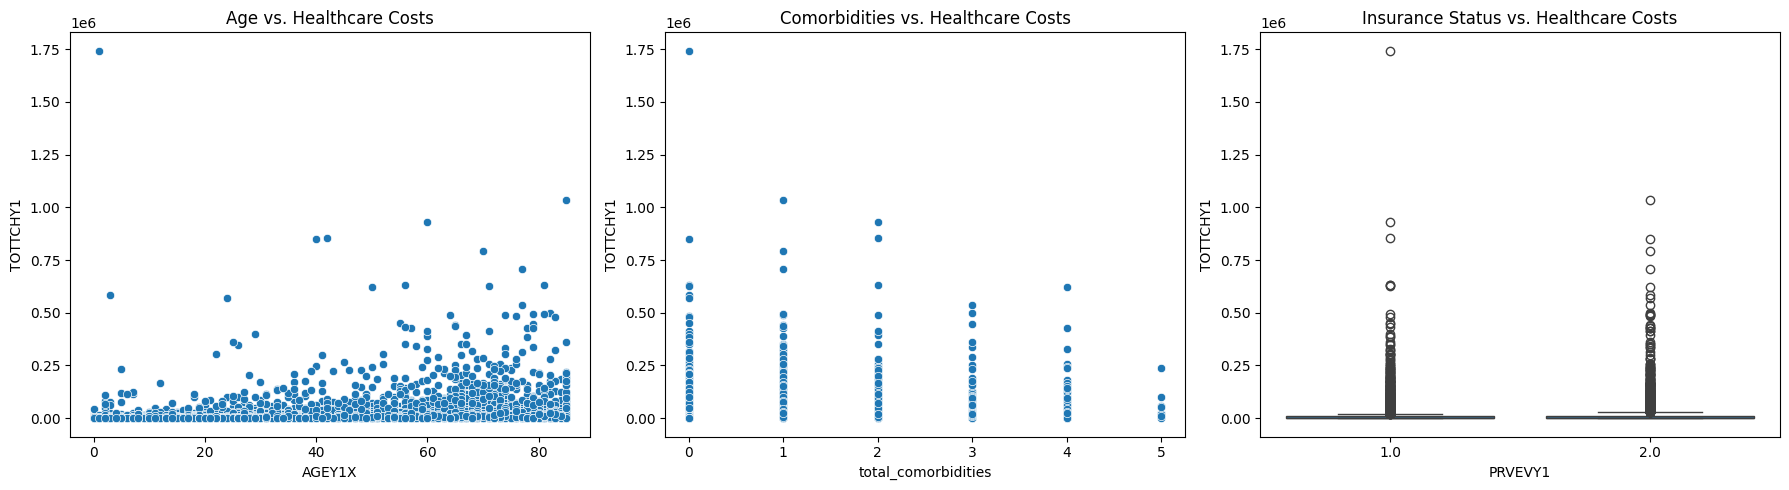

In [2]:

# Summary statistics
print("Summary Statistics:")
print(df_clean.describe())
    
# Histograms of key variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_clean['TOTTCHY1'], ax=axes[0], kde=True).set_title('Distribution of Total Healthcare Costs')
sns.histplot(df_clean['AGEY1X'], ax=axes[1], kde=True).set_title('Distribution of Age')
sns.histplot(df_clean['total_comorbidities'], ax=axes[2], kde=True).set_title('Distribution of Total Comorbidities')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()
    
# Scatter plots to visualize relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df_clean, x='AGEY1X', y='TOTTCHY1', ax=axes[0]).set_title('Age vs. Healthcare Costs')
sns.scatterplot(data=df_clean, x='total_comorbidities', y='TOTTCHY1', ax=axes[1]).set_title('Comorbidities vs. Healthcare Costs')
sns.boxplot(data=df_clean, x='PRVEVY1', y='TOTTCHY1', ax=axes[2]).set_title('Insurance Status vs. Healthcare Costs')
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()
    


## 3. Linear Regression with Raw Healthcare Costs
First build a linear regression model to predict the raw total healthcare costs (`TOTTCHY1`) using `total_comorbidities`, `AGEY1X`, and `PRVEVY1` as predictors.
    

In [ ]:

# Define independent and dependent variables
X_raw = df_clean[['total_comorbidities', 'AGEY1X', 'PRVEVY1']]
y_raw = df_clean['TOTTCHY1']
    
# Split data into training and testing sets
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
    
# Create and fit the model
model_raw = LinearRegression()
model_raw.fit(X_train_raw, y_train_raw)
    
# Get predictions
y_pred_raw = model_raw.predict(X_test_raw)
    
# Evaluate the model
mse_raw = mean_squared_error(y_test_raw, y_pred_raw)
correlation_raw = np.corrcoef(y_test_raw, y_pred_raw)[0, 1]
    
print("Linear Regression with Raw Costs:")
print(f"Coefficients: {model_raw.coef_}")
print(f"Intercept: {model_raw.intercept_}")
print(f"Mean Squared Error: {mse_raw}")
print(f"Correlation between predicted and observed values: {correlation_raw}")
    

Linear Regression with Raw Costs:
Coefficients: [12030.03094814   188.56966331   752.24031496]
Intercept: 2300.3297627033953
Mean Squared Error: 3372690510.013687
Correlation between predicted and observed values: 0.22288023334756799



## 4. Linear Regression with Ranked Healthcare Costs
Next, use the rank of total healthcare costs (`TOTTCHY1_rank`) and repeat the linear regression.
    

In [4]:

# Define independent and dependent variables
X_rank = df_clean[['total_comorbidities', 'AGEY1X', 'PRVEVY1']]
y_rank = df_clean['TOTTCHY1_rank']
    
# Split data into training and testing sets
X_train_rank, X_test_rank, y_train_rank, y_test_rank = train_test_split(X_rank, y_rank, test_size=0.2, random_state=42)
    
# Create and fit the model
model_rank = LinearRegression()
model_rank.fit(X_train_rank, y_train_rank)
    
# Get predictions
y_pred_rank = model_rank.predict(X_test_rank)
    
# Evaluate the model
mse_rank = mean_squared_error(y_test_rank, y_pred_rank)
correlation_rank = np.corrcoef(y_test_rank, y_pred_rank)[0, 1]
    
print("\nLinear Regression with Ranked Costs:")
print(f"Coefficients: {model_rank.coef_}")
print(f"Intercept: {model_rank.intercept_}")
print(f"Mean Squared Error: {mse_rank}")
print(f"Correlation between predicted and observed values: {correlation_rank}")
    


Linear Regression with Ranked Costs:
Coefficients: [ 646.80257838   19.72721365 -331.68336479]
Intercept: 2642.767605375569
Mean Squared Error: 3109899.568117445
Correlation between predicted and observed values: 0.38431194469643615



## 5. Conclusion
This notebook performed a linear regression analysis to explore the economic burden of CVD. The key findings are:
- The model predicting raw healthcare costs performed poorly, likely due to the skewed distribution of the cost data.
- Transforming the outcome variable to its rank significantly improved the model's performance, as indicated by the higher correlation between predicted and observed values.
- The number of comorbidities and age are positively associated with healthcare costs, while private insurance status shows a negative association in the ranked model.
    